# Creating a Convnet

## Dataset
#### Classifying 10 different everyday objects. The dataset i will use is built into tensorflow and called the CIFAR IMAGE Dataset. It contains 60,000 32x32 colour images with 6000 images of each class. 

In [83]:
import tensorflow as tf

from keras import datasets, layers, models
import matplotlib.pyplot as plt

In [84]:
# load and split dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalise pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

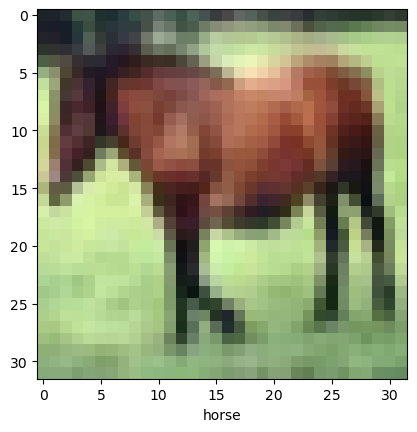

In [85]:
# look at one image
IMG_INDEX = 7  # changeable
plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

# CNN Architecture
### A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few densely connected layers. To idea is that the stack of convolutional and maxpooling layers extract the features from the image.

In [86]:
# building the Convolutional Base
model = models.Sequential()
# Layer1: the input shape of our data will be 32, 32, 3 and will process 32 filters of size 3x3 over our input data.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Layer 2: will perform the max pooling operation using 2x2 samples and a stride of 2.
model.add(layers.MaxPooling2D((2, 2)))

# Other Layers: The next set of layers do very similar things but take as input the feature map from the previous layer. Increase the frequency of filters from 32 to 64.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [87]:
# Completed the convolutional base!! but let's have a look at these features ;)
model.summary() # have a look at our model so far

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

# Adding Dense Layers

In [88]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [89]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# Training

In [90]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=4, 
                    validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3665 - loss: 1.7217 - val_accuracy: 0.5554 - val_loss: 1.2380
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5814 - loss: 1.1821 - val_accuracy: 0.6197 - val_loss: 1.0836
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6429 - loss: 1.0178 - val_accuracy: 0.6596 - val_loss: 0.9785
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6831 - loss: 0.9080 - val_accuracy: 0.6494 - val_loss: 1.0079


# Evaluating the Model


In [91]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.6494 - loss: 1.0079
Test accuracy: 0.649399995803833


# Data Augmentation

In [104]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# pick an image to transform
test_ima  = train_images[20]
img = image.img_to_array(test_ima) # convert image to numpy array
img = img.reshape((1,) + img.shape)

i = 0

# this loop runs forever until we break, saving images to current directory with specified prefix
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i +=1
    if i > 4: # show 4 images
        break
plt.show()

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/opt/anaconda3/lib/python3.12/site-packages/keras/api/preprocessing/image/__init__.py)

# Using a Pretrained Model

In [94]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

# Dataset
### We will load the cat_vs_dogs datasets from the module tensorflow_datasets.

In [102]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 8% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

# seems like there are many problems, an update may come on june 13

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 217 extraneous bytes before marker 0xd9
Corrupt JPEG data: 133 extraneous bytes before marker 0xd9
Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 164 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1408 extraneous bytes before marker 0xd9
Corrupt JPEG data: 259 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


Dataset cats_vs_dogs downloaded and prepared to /Users/snowwhite/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


2025-06-10 16:27:41.631734: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-06-10 16:27:41.698491: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


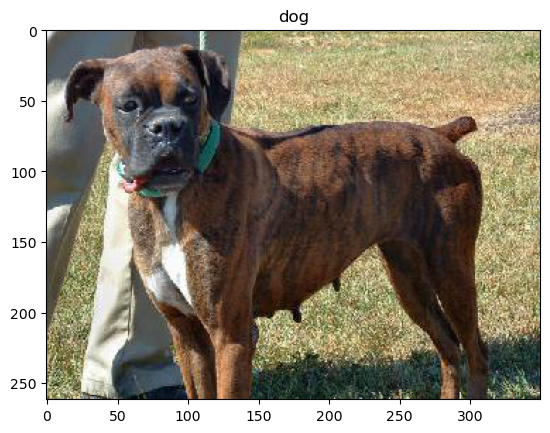

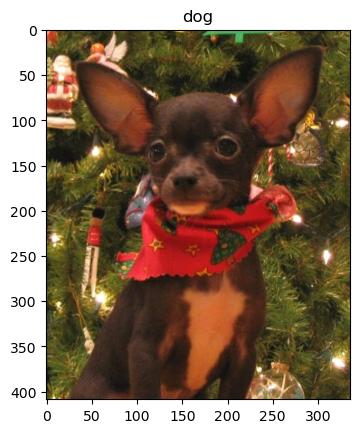

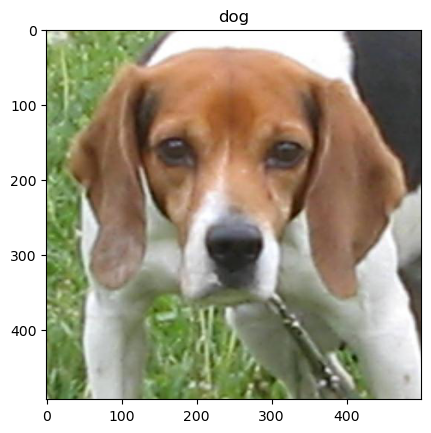

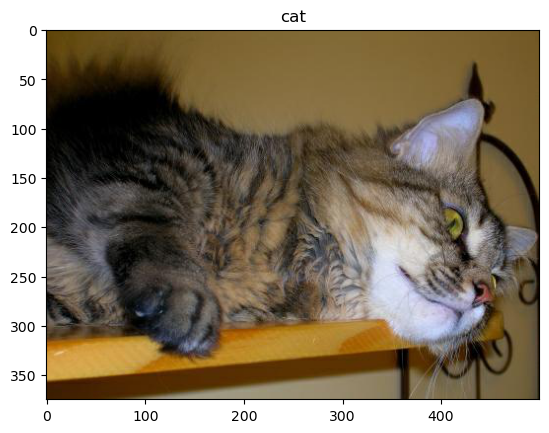

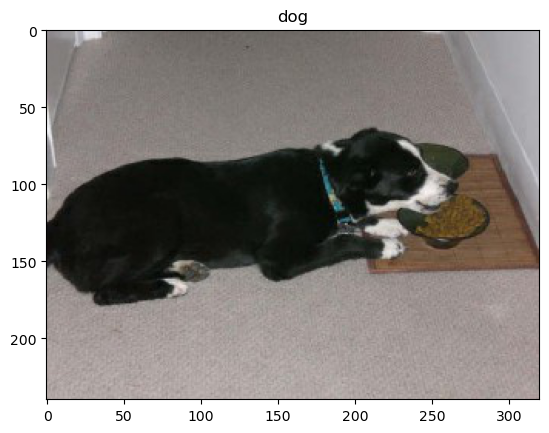

In [103]:
# create a function object that we can use to get labels
get_label_name = metadata.features['label'].int2str

# display 2 images from the dataset
for image, label in raw_train.take(5):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))
